In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

QUESTION 1

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#loading the dataset
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [3]:
#find the no of unique values in each column
X_train.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [4]:
#find the null values in each column
X_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
X_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [6]:
#dropping id and unnamed columns and seperating the target variable
X_train.drop(['id','Unnamed: 0'],axis=1,inplace=True)
X_test.drop(['id','Unnamed: 0'],axis=1,inplace=True)
y_train = X_train['satisfaction']
X_train.drop(['satisfaction'],axis=1,inplace=True)
y_test = X_test['satisfaction']
X_test.drop(['satisfaction'],axis=1,inplace=True)

In [7]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [8]:
#filling the null values with mean
X_train.fillna(X_train.mean(),inplace=True)
X_test.fillna(X_test.mean(),inplace=True)

<AxesSubplot: xlabel='Age', ylabel='Flight Distance'>

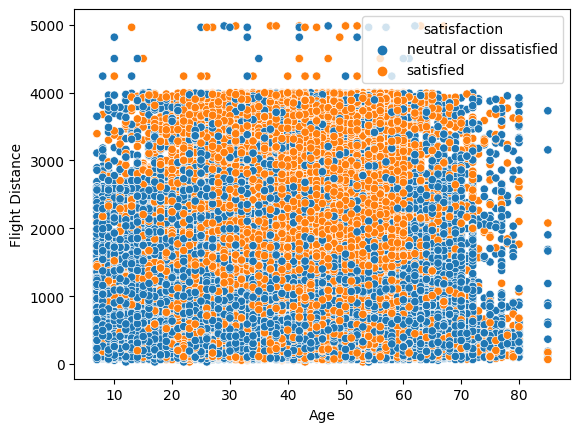

In [9]:
#visualizing the features with scatter plot and hue as target variable
sns.scatterplot(x='Age',y='Flight Distance',hue=y_train,data=X_train)

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Flight Distance'}>,
        <AxesSubplot: title={'center': 'Inflight wifi service'}>,
        <AxesSubplot: title={'center': 'Departure/Arrival time convenient'}>],
       [<AxesSubplot: title={'center': 'Ease of Online booking'}>,
        <AxesSubplot: title={'center': 'Gate location'}>,
        <AxesSubplot: title={'center': 'Food and drink'}>,
        <AxesSubplot: title={'center': 'Online boarding'}>],
       [<AxesSubplot: title={'center': 'Seat comfort'}>,
        <AxesSubplot: title={'center': 'Inflight entertainment'}>,
        <AxesSubplot: title={'center': 'On-board service'}>,
        <AxesSubplot: title={'center': 'Leg room service'}>],
       [<AxesSubplot: title={'center': 'Baggage handling'}>,
        <AxesSubplot: title={'center': 'Checkin service'}>,
        <AxesSubplot: title={'center': 'Inflight service'}>,
        <AxesSubplot: title={'center': 'Cleanliness'}>],
       [<AxesSub

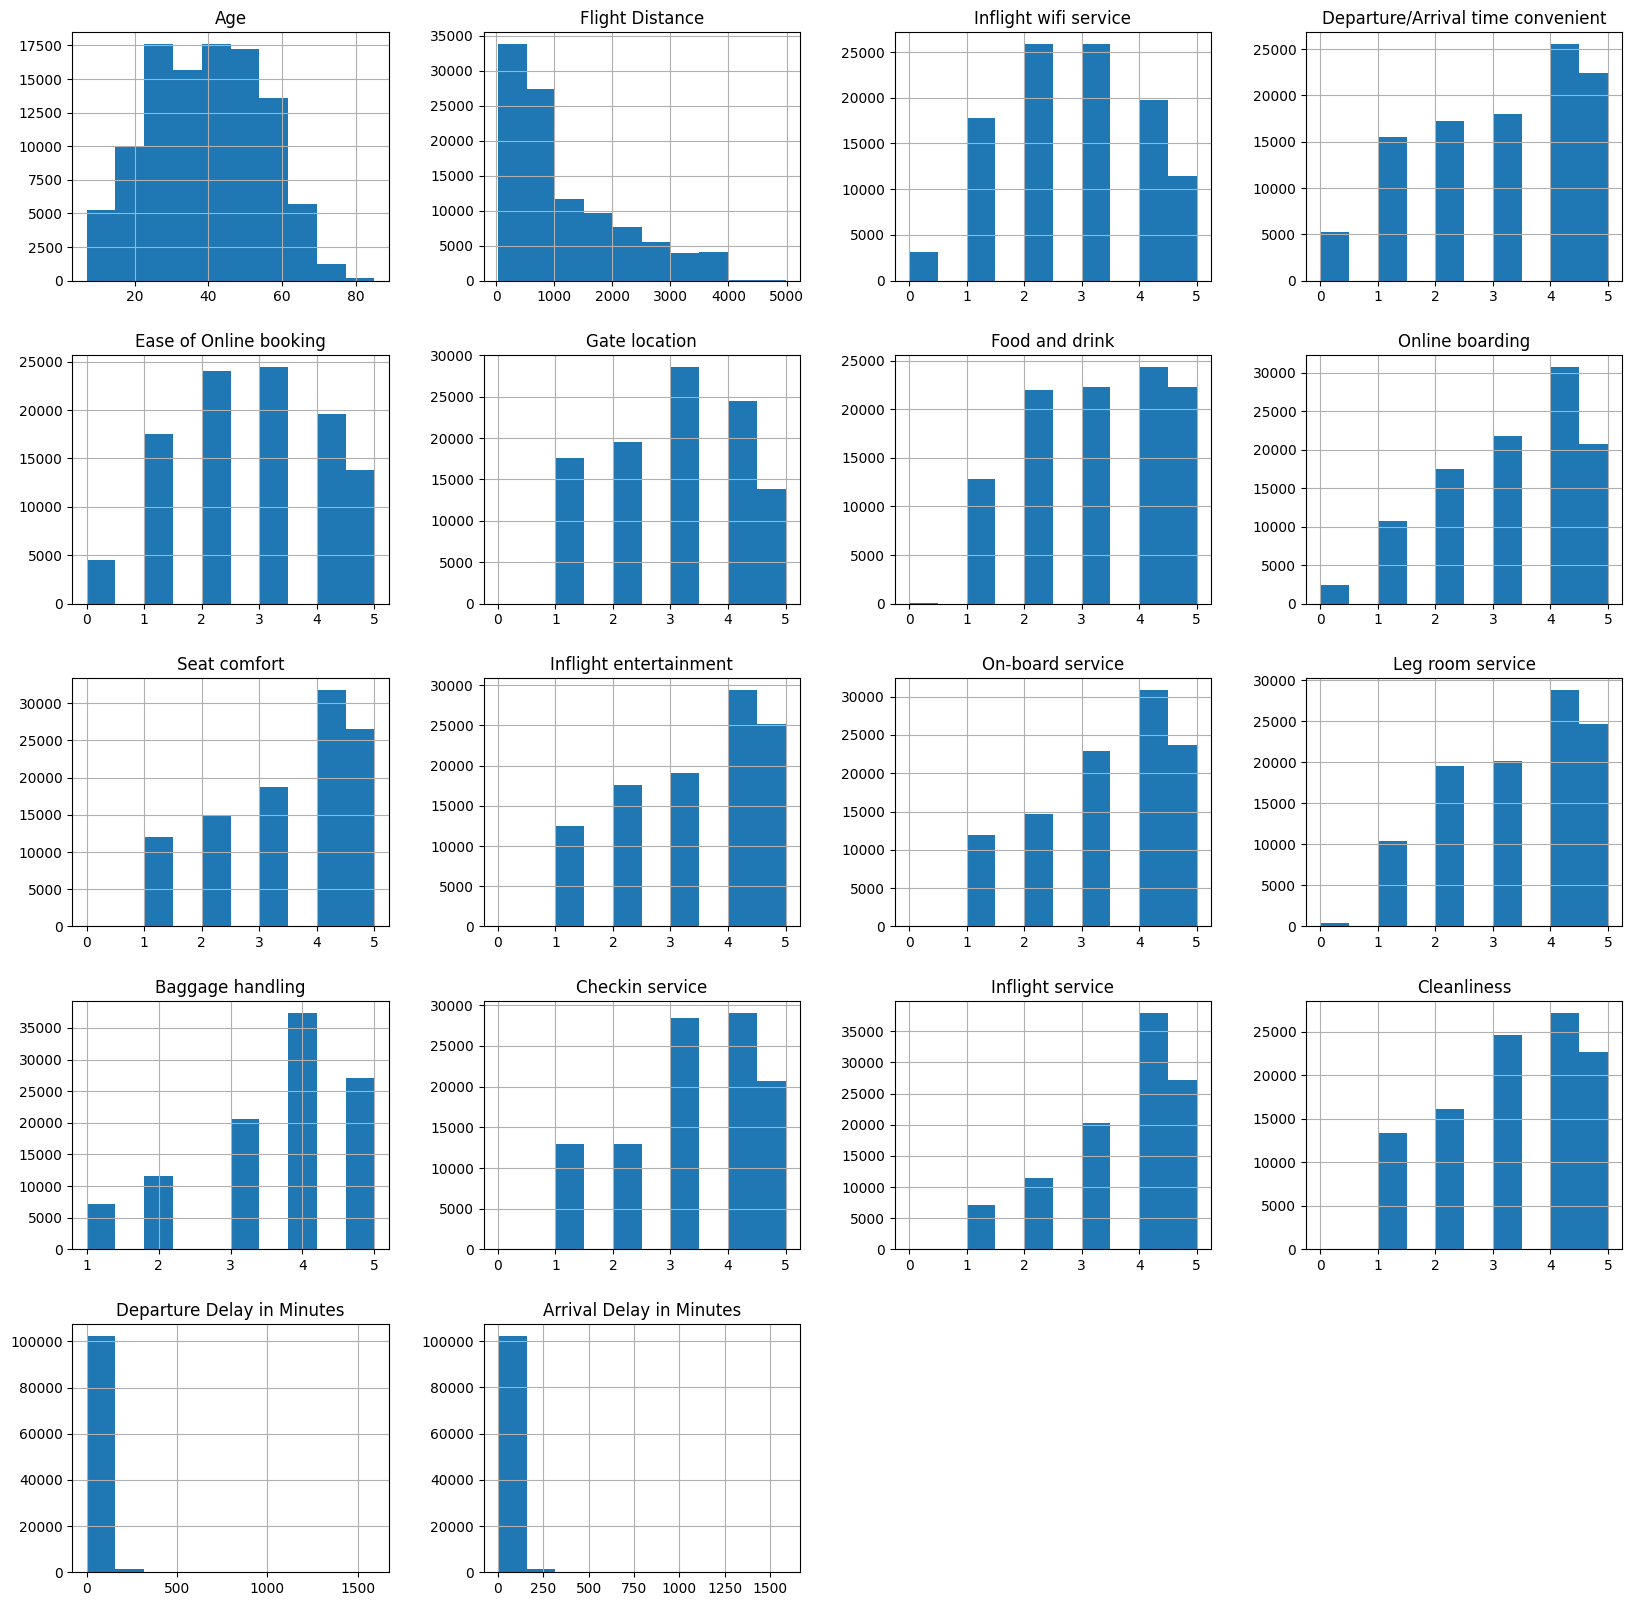

In [10]:
#visualizing the features with histogram
X_train.hist(figsize=(20,20))

In [11]:
#encoding the categorical variables with ordinal encoding
X_train['Type of Travel'] = X_train['Type of Travel'].map({'Personal Travel':0,'Business travel':1})
X_test['Type of Travel'] = X_test['Type of Travel'].map({'Personal Travel':0,'Business travel':1})
X_train['Class'] = X_train['Class'].map({'Eco':0,'Eco Plus':1,'Business':2})
X_test['Class'] = X_test['Class'].map({'Eco':0,'Eco Plus':1,'Business':2})
X_train['Customer Type'] = X_train['Customer Type'].map({'Loyal Customer':0,'disloyal Customer':1})
X_test['Customer Type'] = X_test['Customer Type'].map({'Loyal Customer':0,'disloyal Customer':1})
X_train['Gender'] = X_train['Gender'].map({'Female':0,'Male':1})
X_test['Gender'] = X_test['Gender'].map({'Female':0,'Male':1})

In [12]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,0,1,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,1,2,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,1,2,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,1,2,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,1,2,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


<AxesSubplot: >

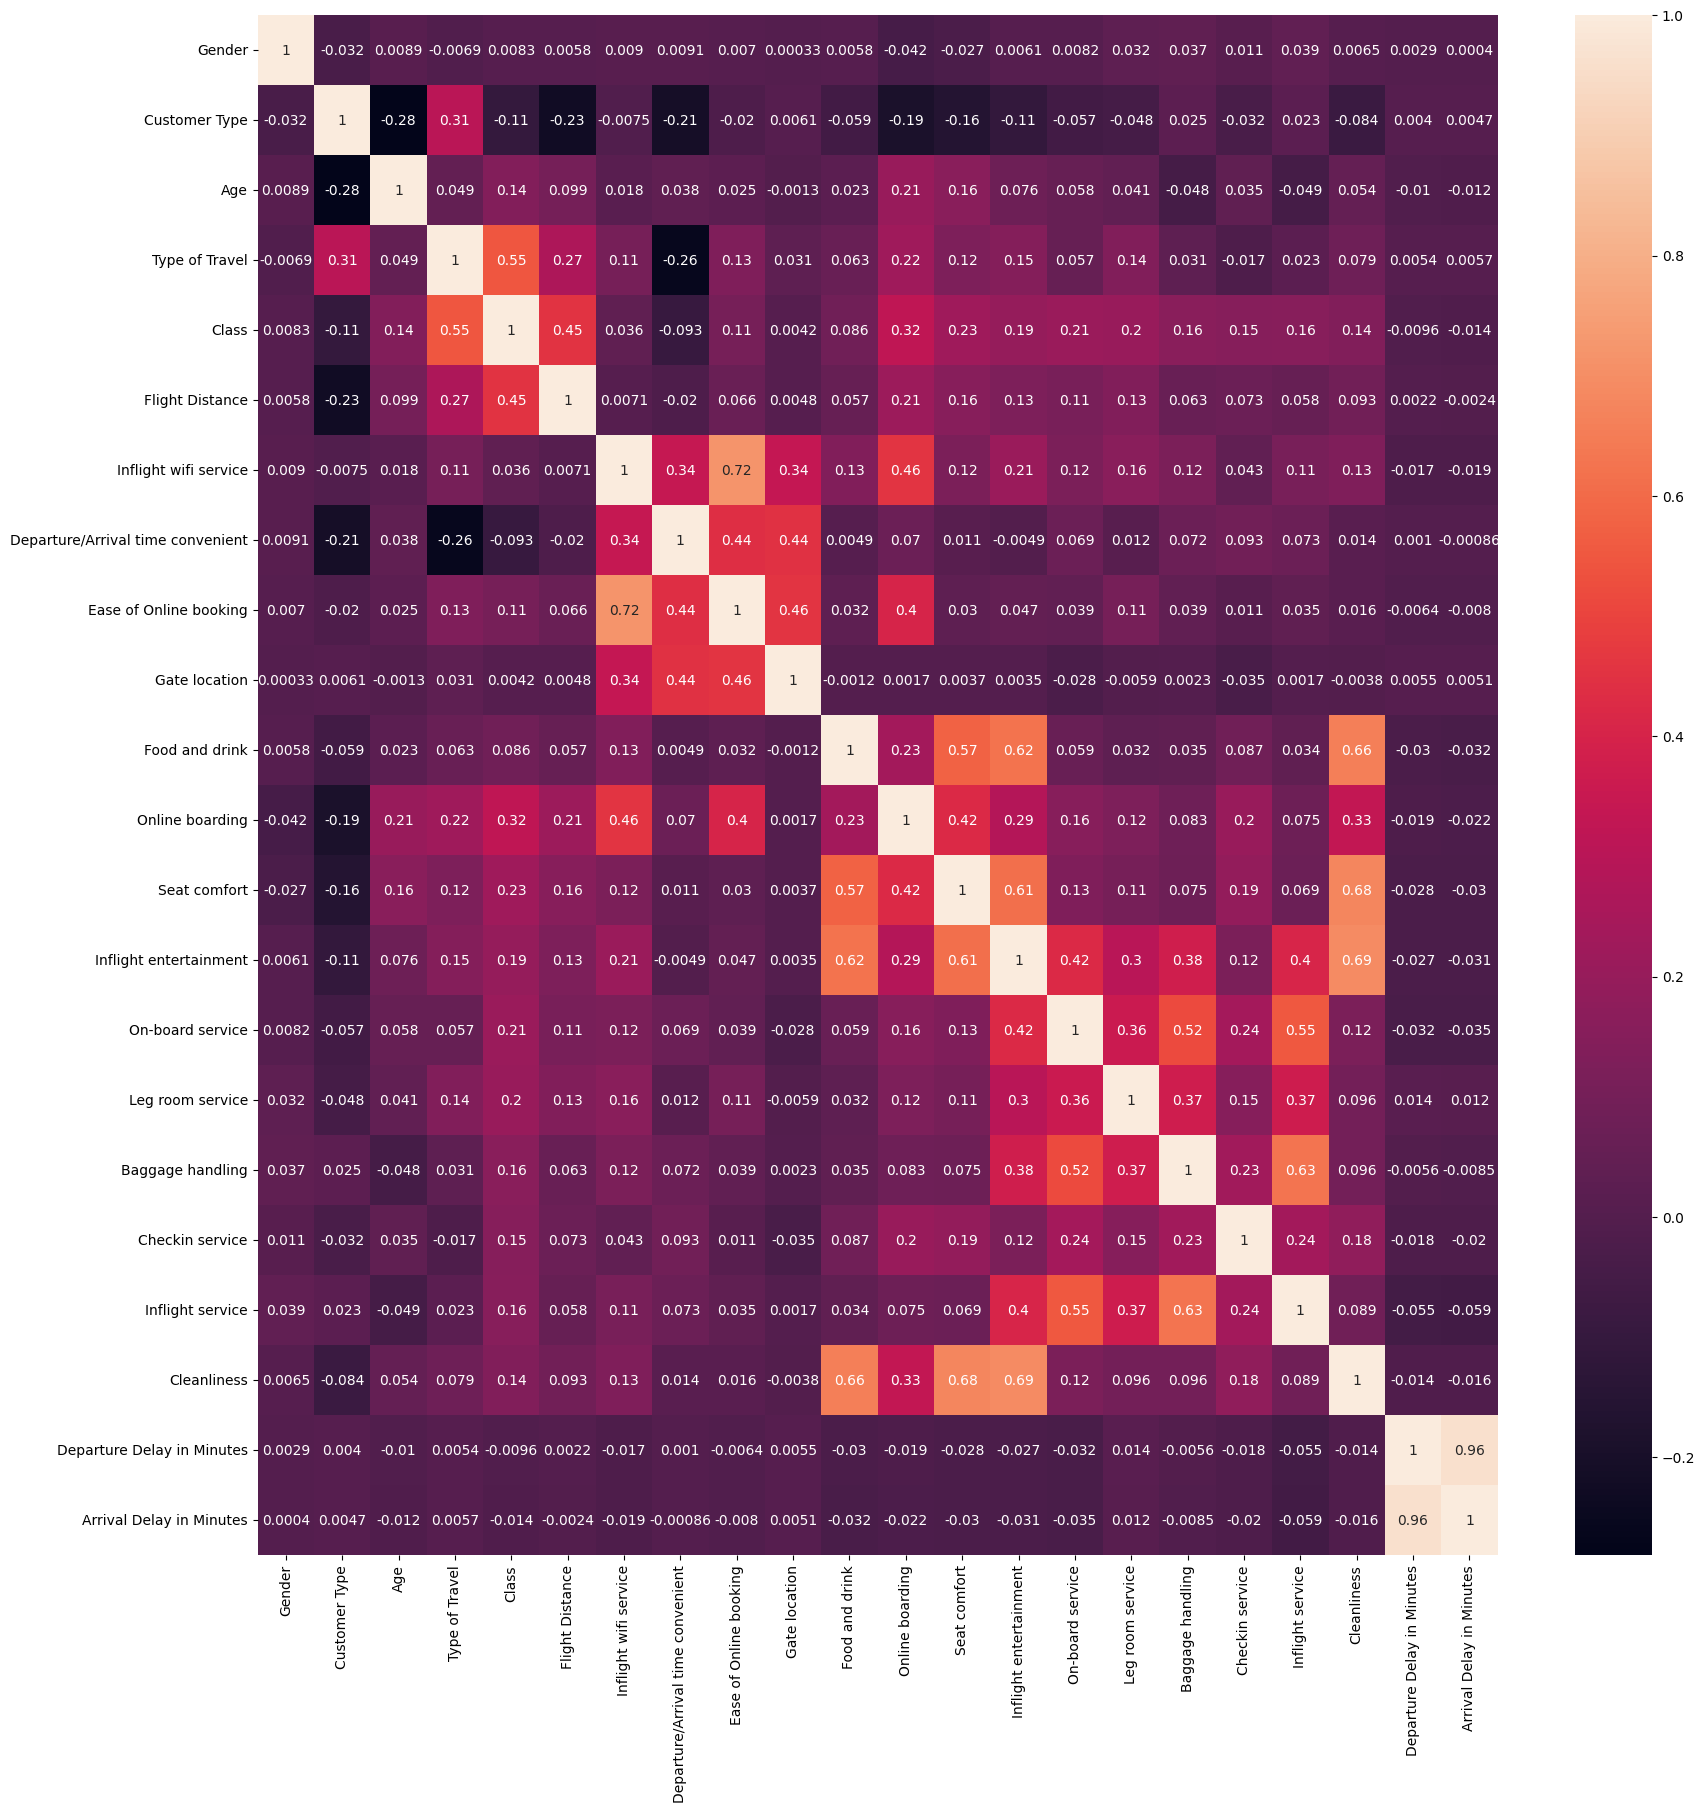

In [13]:
#plotting the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)

2) Create an object of SFS by embedding the Decision Tree classifier object, providing 10 features, 
forward as True, floating as False and scoring = accuracy. Train SFS and report accuracy for all 10 
features. Also, list the names of the 10 best features selected by SFS. [10 marks]


In [14]:
#using the sequential feature selector to select the best 10 features
sfs = SFS(DecisionTreeClassifier(),k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)
sfs.fit(X_train,y_train)
sfs.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   29.8s finished

[2023-03-31 16:40:08] Features: 1/10 -- score: 0.7903833960456308[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   26.9s finished

[2023-03-31 16:40:35] Features: 2/10 -- score: 0.8496881632686332[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   28.5s finished

[2023-03-31 16:41:04] Features: 3/10 -- score: 0.8912649918655335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'Baggage handling',
 'Inflight service')

In [75]:
#calculating the accuracy score for all 10 features
clf = DecisionTreeClassifier()
clf.fit(X_train[list(sfs.k_feature_names_)],y_train)
y_pred = clf.predict(X_test[list(sfs.k_feature_names_)])
print('accuracy_score for 10 best features',accuracy_score(y_test,y_pred))

accuracy_score for 10 best features 0.9530720665229443


 Using the forward and Floating parameter toggle between SFS(forward True, floating False), SBS 
(forward False, floating False), SFFS (forward True, floating True), SBFS (forward False, floating True), 
and choose cross validation = 4 for each configuration. Also, report cv scores for each configuration. [5 
marks]

In [15]:
sfs_T_F = SFS(DecisionTreeClassifier(),k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=4)
sfs_T_F.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   14.5s finished

[2023-03-31 16:44:08] Features: 1/10 -- score: 0.7903834308592547[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   15.2s finished

[2023-03-31 16:44:23] Features: 2/10 -- score: 0.8496881736987989[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.5s finished

[2023-03-31 16:44:38] Features: 3/10 -- score: 0.8912650138589467[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          k_features=(10, 10), scoring='accuracy', verbose=2)

In [16]:
sfs_T_T = SFS(DecisionTreeClassifier(),k_features=10,forward=True,floating=True,verbose=2,scoring='accuracy',cv=4)
sfs_T_T.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   12.5s finished

[2023-03-31 16:46:33] Features: 1/10 -- score: 0.7903834308592547[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   12.7s finished

[2023-03-31 16:46:46] Features: 2/10 -- score: 0.8496881736987989[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jo

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          floating=True, k_features=(10, 10),
                          scoring='accuracy', verbose=2)

In [17]:
sfs_F_F = SFS(DecisionTreeClassifier(),k_features=10,forward=False,floating=False,verbose=2,scoring='accuracy',cv=4)
sfs_F_F.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.7min finished

[2023-03-31 16:53:08] Features: 21/10 -- score: 0.9459982291345858[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  1.5min finished

[2023-03-31 16:54:36] Features: 20/10 -- score: 0.9462773329226979[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.4min finished

[2023-03-31 16:56:00] Features: 19/10 -- score: 0.9463350785340313[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          forward=False, k_features=(10, 10),
                          scoring='accuracy', verbose=2)

In [18]:
sfs_F_T = SFS(DecisionTreeClassifier(),k_features=10,forward=False,floating=True,verbose=2,scoring='accuracy',cv=4)
sfs_F_T.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   57.7s finished

[2023-03-31 17:04:45] Features: 21/10 -- score: 0.9458249923005851[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   47.3s finished

[2023-03-31 17:05:33] Features: 20/10 -- score: 0.9462869571912533[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   44.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          floating=True, forward=False, k_features=(10, 10),
                          scoring='accuracy', verbose=2)

In [19]:
#printing the scores of the models
print('Sequential Feature Selection forward = True and floating = False : ',sfs_T_F.k_score_)
print('Sequential Feature Selection forward = True and floating = True : ',sfs_T_T.k_score_)
print('Sequential Feature Selection forward = False and floating = False : ',sfs_F_F.k_score_)
print('Sequential Feature Selection forward = False and floating = True : ',sfs_F_T.k_score_)

Sequential Feature Selection forward = True and floating = False :  0.9500885432707116
Sequential Feature Selection forward = True and floating = True :  0.9513685709886048
Sequential Feature Selection forward = False and floating = False :  0.950098167539267
Sequential Feature Selection forward = False and floating = True :  0.9515225592854943


 Visualize the output from the feature selection in a pandas DataFrame format using the get_metric_dict 
for all four configurations. Finally, plot the results for each configuration (from mlxtend. plotting import 
plot_sequential_feature_selection as plot_sfs). [10 marks]


In [20]:
#converting get_metric_dict to dataframe
df_T_F = pd.DataFrame.from_dict(sfs_T_F.get_metric_dict()).T
df_T_T = pd.DataFrame.from_dict(sfs_T_T.get_metric_dict()).T
df_F_F = pd.DataFrame.from_dict(sfs_F_F.get_metric_dict()).T
df_F_T = pd.DataFrame.from_dict(sfs_F_T.get_metric_dict()).T

In [84]:
print('Sequential Feature Selection forward = True and floating = True : ')
df_T_T.head()

Sequential Feature Selection forward = True and floating = True : 


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7895364952263628, 0.792231290421928, 0.7930...",0.790383,"(Online boarding,)",0.003933,0.002454,0.001417
2,"(3, 11)","[0.8483215275639051, 0.8512088081305821, 0.850...",0.849688,"(Type of Travel, Online boarding)",0.001959,0.001222,0.000705
3,"(3, 6, 11)","[0.8915152448413921, 0.8920157068062827, 0.892...",0.891265,"(Type of Travel, Inflight wifi service, Online...",0.001961,0.001224,0.000706
4,"(3, 6, 9, 11)","[0.919271635355713, 0.9229673544810595, 0.9223...",0.921735,"(Type of Travel, Inflight wifi service, Gate l...",0.002316,0.001445,0.000834
5,"(1, 3, 6, 9, 11)","[0.9277024946104097, 0.9285494302433015, 0.929...",0.9288,"(Customer Type, Type of Travel, Inflight wifi ...",0.001189,0.000742,0.000428


In [81]:
print('Sequential Feature Selection forward = False and floating = False : ')
df_F_F.head()

Sequential Feature Selection forward = False and floating = False : 


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9432168155220203, 0.9486834000615953, 0.945...",0.946277,"(Gender, Customer Type, Age, Type of Travel, C...",0.003356,0.002093,0.001209
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[0.9436787804126886, 0.9483369263935941, 0.945...",0.945998,"(Gender, Customer Type, Age, Type of Travel, C...",0.002742,0.001711,0.000988
20,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...","[0.9442177394518017, 0.9466815522020327, 0.945...",0.946277,"(Gender, Customer Type, Age, Type of Travel, C...",0.002782,0.001735,0.001002
19,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...","[0.9444487218971358, 0.9465275639051433, 0.947...",0.946335,"(Gender, Customer Type, Age, Type of Travel, C...",0.001798,0.001122,0.000648
18,"(0, 1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 1...","[0.9444487218971358, 0.946181090237142, 0.9469...",0.946537,"(Gender, Customer Type, Age, Type of Travel, C...",0.002359,0.001472,0.00085


In [82]:
print('Sequential Feature Selection forward = False and floating = True : ')
df_F_T.head()


Sequential Feature Selection forward = False and floating = True : 


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9425623652602402, 0.9465275639051433, 0.946...",0.9457,"(Gender, Customer Type, Age, Type of Travel, C...",0.003021,0.001885,0.001088
21,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.9443332306744687, 0.9462965814598091, 0.944...",0.945825,"(Gender, Customer Type, Age, Type of Travel, C...",0.002545,0.001588,0.000917
20,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 1...","[0.9456036341238065, 0.9466815522020327, 0.945...",0.946287,"(Gender, Customer Type, Age, Type of Travel, C...",0.001483,0.000925,0.000534
19,"(1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[0.944256236526024, 0.9488758854327071, 0.9460...",0.946903,"(Customer Type, Age, Type of Travel, Class, In...",0.003006,0.001875,0.001083
18,"(1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...","[0.9455651370495842, 0.949299353249153, 0.9461...",0.947163,"(Customer Type, Age, Type of Travel, Class, In...",0.002322,0.001448,0.000836


In [83]:
print('Sequential Feature Selection forward = True and floating = False : ')
df_T_F.head()

Sequential Feature Selection forward = True and floating = False : 


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7895364952263628, 0.792231290421928, 0.7930...",0.790383,"(Online boarding,)",0.003933,0.002454,0.001417
2,"(3, 11)","[0.8483215275639051, 0.8512088081305821, 0.850...",0.849688,"(Type of Travel, Online boarding)",0.001959,0.001222,0.000705
3,"(3, 6, 11)","[0.8915152448413921, 0.8920157068062827, 0.892...",0.891265,"(Type of Travel, Inflight wifi service, Online...",0.001961,0.001224,0.000706
4,"(3, 6, 9, 11)","[0.919271635355713, 0.9229673544810595, 0.9223...",0.921735,"(Type of Travel, Inflight wifi service, Gate l...",0.002316,0.001445,0.000834
5,"(1, 3, 6, 9, 11)","[0.9277024946104097, 0.9285494302433015, 0.929...",0.9288,"(Customer Type, Type of Travel, Inflight wifi ...",0.001189,0.000742,0.000428


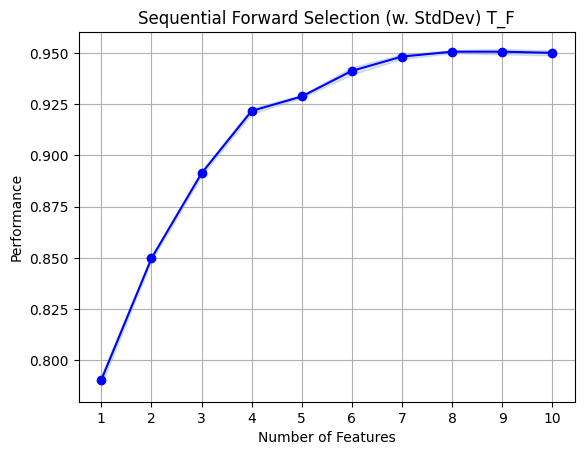

In [22]:
from mlxtend. plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs_T_F.get_metric_dict(),kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev) T_F')
plt.grid()
plt.show()

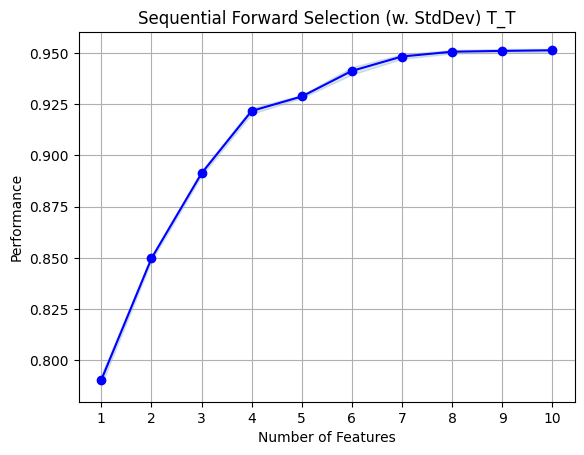

In [23]:
#plotting the sequential feature selection for forward = True and floating = True
fig2 = plot_sfs(sfs_T_T.get_metric_dict(),kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev) T_T')
plt.grid()
plt.show()

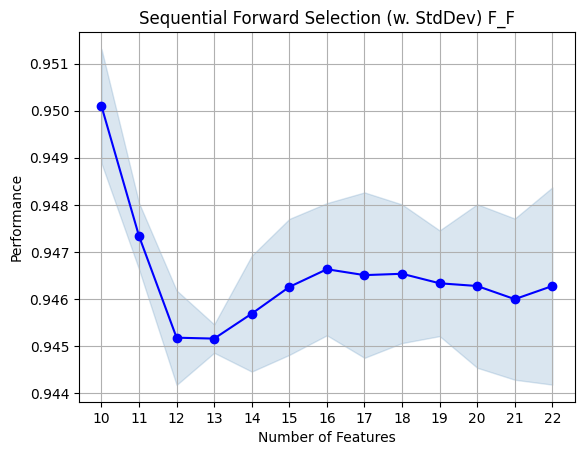

In [24]:
#plotting the sequential feature selection for forward = False and floating = False
fig3 = plot_sfs(sfs_F_F.get_metric_dict(),kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev) F_F')
plt.grid()
plt.show()

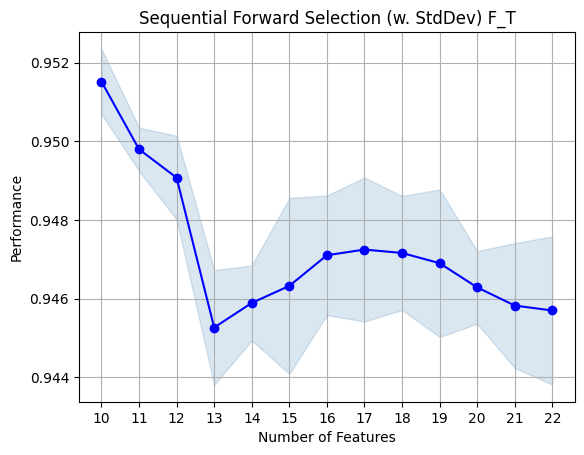

In [25]:
#plotting the sequential feature selection for forward = False and floating = True
fig4 = plot_sfs(sfs_F_T.get_metric_dict(),kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev) F_T')
plt.grid()
plt.show()

5) Implement Bi-directional Feature Set Generation Algorithm from scratch. It must take a Full Set of 
features as well as similarity measures as input. [10 marks]
6) Use the function implemented in part 5 and use selection criteria from the following: [10 marks]
● Accuracy Measures: using Decision Tree and SVM Classifiers
● Information Measures: Information gain
● Distance Measure: Angular Separation, Euclidian Distance and City-Block Distance 
● Distance Measures. - Measures of separability, discrimination or divergence measures. The 
most typical is derived from the distance between the class conditional density functions.)

In [26]:
#implementing the sequential feature selector with forward = True and floating = True from scratch
from sklearn.model_selection import cross_val_score
#the fuction takes the training data, target variable, model, no of features to be selected, scoring metric and no of folds as input and returns the selected features and the score
def sfs_scratch(X,y,model,k,scoring,cv):
    features = list(X.columns)
    #first we will sort the features on thier correlation with the target variable
    selected_features = []
    score = 0
    while(len(selected_features) < k):
        max_score = 0
        for feature in features:
            selected_features.append(feature)
            score = cross_val_score(model,X[selected_features],y,scoring=scoring,cv=cv).mean()
            if(score > max_score):
                max_score = score
                best_feature = feature
            selected_features.remove(feature)
        selected_features.append(best_feature)
        features.remove(best_feature)
    score = cross_val_score(model,X[selected_features],y,scoring=scoring,cv=cv).mean()
    return selected_features,score

Train any classifier of your choice on the Selected features generated from each measure and report its 
classification results. [10 marks]

In [27]:
#using decision tree classifier as the model, and information gain as the scoring metric and distance mesure as euclidean distance
selected_features_dtc,score_dtc = sfs_scratch(X_train,y_train,DecisionTreeClassifier(),10,'accuracy',5)
print('The selected features are : ',selected_features_dtc)
print('The score is : ',score_dtc)

The selected features are :  ['Online boarding', 'Type of Travel', 'Inflight wifi service', 'Gate location', 'Baggage handling', 'Customer Type', 'Class', 'Inflight service', 'Seat comfort', 'Inflight entertainment']
The score is :  0.9507333793422668


In [28]:
#making a new dataframe with the selected features_dtc from X_train
X_train_dtc = X_train[selected_features_dtc]
X_test_dtc = X_test[selected_features_dtc]

In [29]:
from sklearn.neighbors import KNeighborsClassifier
#fitting the knn on the selected features
knn_dtc = KNeighborsClassifier()
knn_dtc.fit(X_train_dtc,y_train)
y_pred_dtc = knn_dtc.predict(X_test_dtc)
print('The accuracy score is : ',accuracy_score(y_test,y_pred_dtc))

The accuracy score is :  0.9433708038189098


In [48]:
#applying gnb on dtc selected features
from sklearn.naive_bayes import GaussianNB
gnb_dtc = GaussianNB()
gnb_dtc.fit(X_train_dtc,y_train)
y_pred_gnb_dtc = gnb_dtc.predict(X_test_dtc)
print('The accuracy score is : ',accuracy_score(y_test,y_pred_gnb_dtc))

The accuracy score is :  0.8639128426239606


In [54]:
#applying svm on dtc selected features
from sklearn.svm import SVC
svm_dtc = SVC()
svm_dtc.fit(X_train_dtc,y_train)
y_pred_svm_dtc = svm_dtc.predict(X_test_dtc)
print('The accuracy score is : ',accuracy_score(y_test,y_pred_svm_dtc))

The accuracy score is :  0.9415614413304589


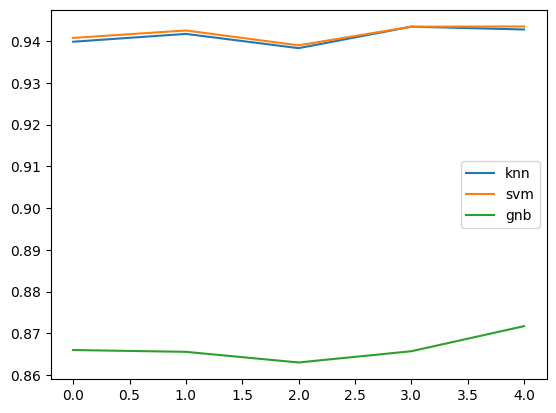

In [55]:
#plotting the k-fold scores of knn,svm and gnb
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn_dtc,X_train_dtc,y_train,cv=5)
svm_scores = cross_val_score(svm_dtc,X_train_dtc,y_train,cv=5)
gnb_scores = cross_val_score(gnb_dtc,X_train_dtc,y_train,cv=5)

plt.plot(knn_scores,label='knn')
plt.plot(svm_scores,label='svm')
plt.plot(gnb_scores,label='gnb')
plt.legend()
plt.show()

QUESTION 2

Make a Dataset of 1000 points sampled from a zero-centred gaussian distribution with a covariance 
matrix


In [56]:
cov_mat=np.array([[0.6006771,0.14889879,0.244939],[0.14889879,0.58982531,0.24154981],[0.244939,0.24154981,0.48778655]])

#generating 1000 random samples from cov_mat
data=np.random.multivariate_normal([0,0,0],cov_mat,1000)
#converting data to dataframe
df=pd.DataFrame(data,columns=['x1','x2','x3'])
df.head()

,x1,x2,x3
0,-0.030247,0.636874,-0.019877
1,-0.382995,-0.012076,-0.220751
2,-0.590303,-0.238312,-0.100363
3,1.916810,2.562811,1.953066
4,0.219001,0.747904,0.942919


In [57]:
#making vector v
from math import sqrt
vector_v = np.array([1/sqrt(6),1/sqrt(6),-2/sqrt(6)])
vector_v

array([ 0.40824829,  0.40824829, -0.81649658])

In [58]:
#making dustribution of data into classses
df['class'] = df.apply(lambda row: 0 if np.dot(row,vector_v) > 0 else 1, axis=1)
df.head()

,x1,x2,x3,class
0,-0.030247,0.636874,-0.019877,0
1,-0.382995,-0.012076,-0.220751,0
2,-0.590303,-0.238312,-0.100363,1
3,1.916810,2.562811,1.953066,0
4,0.219001,0.747904,0.942919,1


In [59]:
#splitting into X_data and y_data
X_data=df.drop('class',axis=1)
y_data=df['class']

In [60]:
#Visualizing the data as a 3D scatter-plot using plotly’s scatter_3d function
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=X_data['x1'], y=X_data['x2'], z=X_data['x3'], mode='markers',marker=dict(color=y_data))])
fig.show()

Apply Principal Component analysis (using sklearn) with n_components=3 on the input data X 
and transform the data accordingly. 

In [61]:
#applying PCA on the data
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_data)
X_pca = pca.transform(X_data)

#printing the shape of X_pca
X_pca.shape

(1000, 3)

In [62]:
#visualizing the data after applying PCA using plotly’s scatter_3d function
fig = go.Figure(data=[go.Scatter3d(x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2], mode='markers',marker=dict(color=y_data))])
fig.show()

In [63]:
#convert X_pca to dataframe
X_pca_df=pd.DataFrame(X_pca,columns=['x1','x2','x3'])
X_pca_df.head()

,x1,x2,x3
0,0.334984,-0.468176,0.260488
1,-0.361836,-0.252732,0.028233
2,-0.543937,-0.228070,-0.245417
3,3.709788,-0.427692,0.217687
4,1.095342,-0.335844,-0.376516


Perform Complete FS on the Transformed Data with a number of features in subset =2. Fit a 
Decision Tree for every subset-set of features of size 2 and plot their decision boundaries 
superimposed with the data

In [64]:
#performing feature selection with a number of features in a subset = 2.
#using Exhaustive Feature Selection
#fitting decision tree classifier at a subset of features of size 2
clf = DecisionTreeClassifier()
efs = EFS(clf, min_features=2, max_features=2, scoring='accuracy', print_progress=True, cv=5)
efs = efs.fit(X_pca_df, y_data)

#printing the subset of features
efs.subsets_



Features: 3/3

{0: {'feature_idx': (0, 1),
  'cv_scores': array([0.51 , 0.525, 0.455, 0.525, 0.505]),
  'avg_score': 0.504,
  'feature_names': ('x1', 'x2')},
 1: {'feature_idx': (0, 2),
  'cv_scores': array([0.955, 0.97 , 0.975, 0.975, 0.985]),
  'avg_score': 0.9720000000000001,
  'feature_names': ('x1', 'x3')},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([1.   , 0.98 , 0.995, 0.99 , 0.995]),
  'avg_score': 0.992,
  'feature_names': ('x2', 'x3')}}

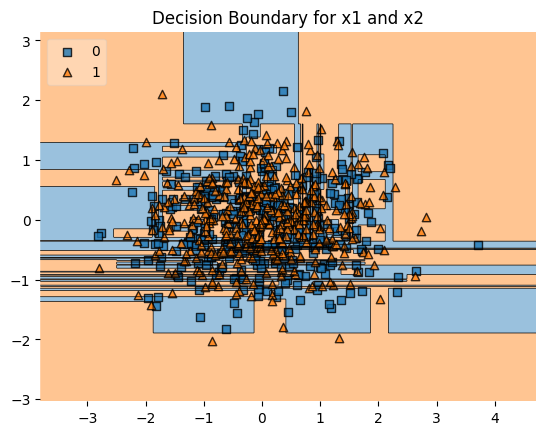

In [65]:
#plotting decision boundaries for x1 and x2
X_x1_x2 = X_pca_df[['x1','x2']]
dtc_x1_x2 = DecisionTreeClassifier()

#train_test_split
X_train_x1_x2, X_test_x1_x2, y_train_x1_x2, y_test_x1_x2 = train_test_split(X_x1_x2, y_data, test_size=0.2, random_state=42)
dtc_x1_x2.fit(X_train_x1_x2, y_train_x1_x2)
fig = plot_decision_regions(X_train_x1_x2.values, y=y_train_x1_x2.values, clf=dtc_x1_x2, legend=2)
plt.title('Decision Boundary for x1 and x2')
plt.show()

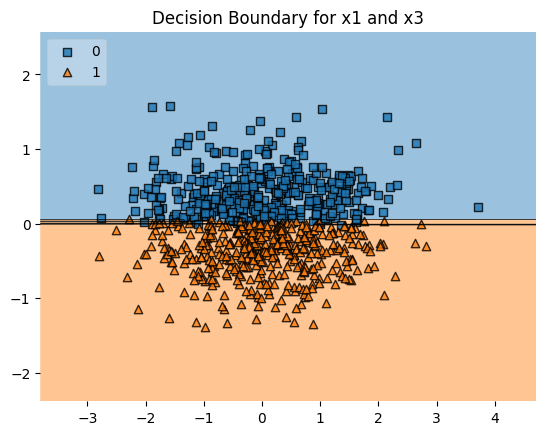

In [66]:
#plotting decision boundaries for x1 and x3
X_x1_x3 = X_pca_df[['x1','x3']]
dtc_x1_x3 = DecisionTreeClassifier()

#train_test_split
X_train_x1_x3, X_test_x1_x3, y_train_x1_x3, y_test_x1_x3 = train_test_split(X_x1_x3, y_data, test_size=0.2, random_state=42)
dtc_x1_x3.fit(X_train_x1_x3, y_train_x1_x3)
fig = plot_decision_regions(X_train_x1_x3.values, y=y_train_x1_x3.values, clf=dtc_x1_x3, legend=2)
plt.title('Decision Boundary for x1 and x3')
plt.show()


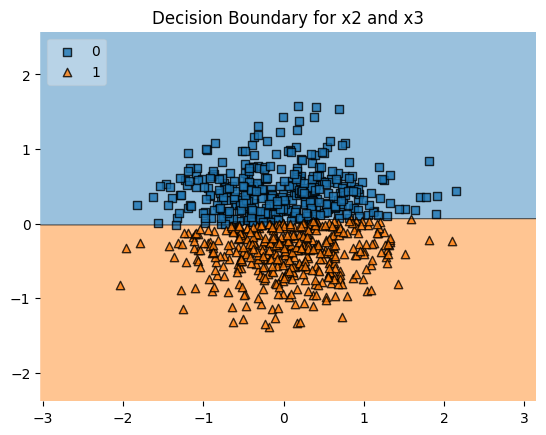

In [67]:
#plotting decision boundaries for x2 and x3
X_x2_x3 = X_pca_df[['x2','x3']]
dtc_x2_x3 = DecisionTreeClassifier()

#train_test_split
X_train_x2_x3, X_test_x2_x3, y_train_x2_x3, y_test_x2_x3 = train_test_split(X_x2_x3, y_data, test_size=0.2, random_state=42)
dtc_x2_x3.fit(X_train_x2_x3, y_train_x2_x3)
fig = plot_decision_regions(X_train_x2_x3.values, y=y_train_x2_x3.values, clf=dtc_x2_x3, legend=2)
plt.title('Decision Boundary for x2 and x3')
plt.show()

Which of the above feature subsets represents the one that can be obtained by applying 
PCA(n_components =2)? Explain the difference in the accuracies between this subset and other 
subsets by running suitable experiments

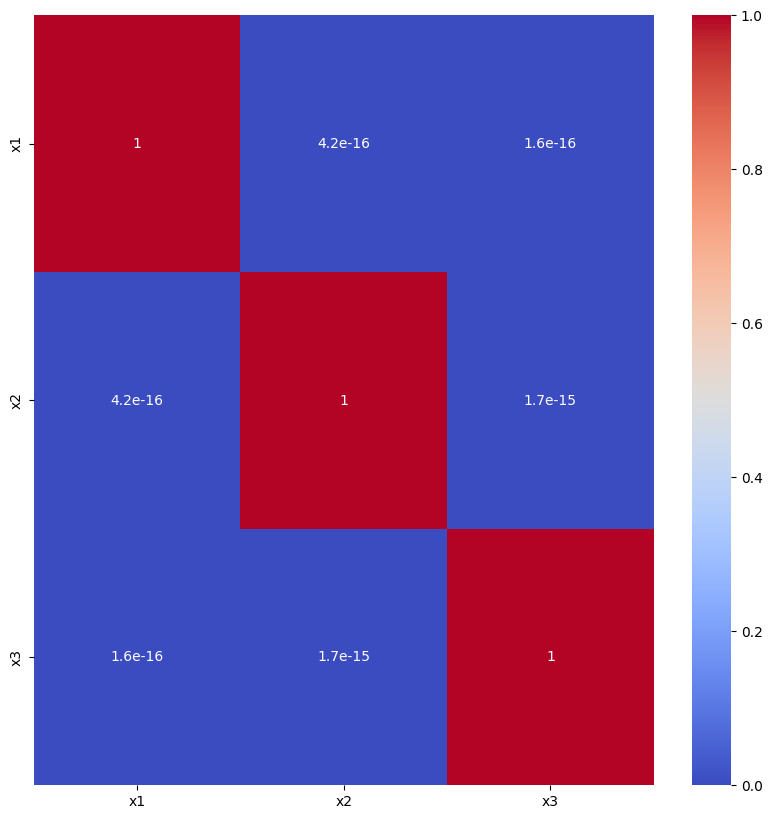

In [68]:
#plotting corelation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_pca_df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [69]:
#plotting variance explained by each component
print(pca.explained_variance_ratio_)

[0.59987213 0.25168671 0.14844116]


We know that pca sorts the order of PC's according to the ration explained by them. So, the first two PC's will be the ones that explain the most variance in the data. So, the subset obtained by PCA(n_components =2) will be the one that has the first two PC's as the features.

In [70]:
#printing the acuracies of all the subsets using all models of dtc above
print('Accuracy of x1 and x2:',accuracy_score(y_test_x1_x2,dtc_x1_x2.predict(X_test_x1_x2)))
print('Accuracy of x1 and x3:',accuracy_score(y_test_x1_x3,dtc_x1_x3.predict(X_test_x1_x3)))
print('Accuracy of x2 and x3:',accuracy_score(y_test_x2_x3,dtc_x2_x3.predict(X_test_x2_x3)))

Accuracy of x1 and x2: 0.475
Accuracy of x1 and x3: 0.97
Accuracy of x2 and x3: 0.995


In [71]:
#printing the f1_score of all the subsets using all models of dtc above
print('F1_score of x1 and x2:',f1_score(y_test_x1_x2,dtc_x1_x2.predict(X_test_x1_x2)))
print('F1_score of x1 and x3:',f1_score(y_test_x1_x3,dtc_x1_x3.predict(X_test_x1_x3)))
print('F1_score of x2 and x3:',f1_score(y_test_x2_x3,dtc_x2_x3.predict(X_test_x2_x3)))

F1_score of x1 and x2: 0.4827586206896552
F1_score of x1 and x3: 0.9722222222222222
F1_score of x2 and x3: 0.9952606635071091


In [72]:
#roc_auc_score of all the subsets using all models of dtc above
print('roc_auc_score of x1 and x2:',roc_auc_score(y_test_x1_x2,dtc_x1_x2.predict(X_test_x1_x2)))
print('roc_auc_score of x1 and x3:',roc_auc_score(y_test_x1_x3,dtc_x1_x3.predict(X_test_x1_x3)))
print('roc_auc_score of x2 and x3:',roc_auc_score(y_test_x2_x3,dtc_x2_x3.predict(X_test_x2_x3)))

roc_auc_score of x1 and x2: 0.4754385964912281
roc_auc_score of x1 and x3: 0.968421052631579
roc_auc_score of x2 and x3: 0.9947368421052631


As from above results we can see that it is not necessary that the subset obtained by PCA(n_components =2) will have the highest accuracy. The subset obtained by PCA(n_components =2) has the lowest accuracy. This is because the subset obtained by PCA(n_components =2) explains the most variance in the data but it does not mean that it will have the highest accuracy. The subset obtained by PCA(n_components =2) has the lowest accuracy because it is not able to capture the non-linear relationship between the features and the target variable. In short, it is not necesary that variance always explains best information about the data.

#appling lda on the data

In [73]:
#applying lda to the dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_data, y_data)

In [74]:
#printing the accuracy of the lda model
print('Accuracy of lda model:',accuracy_score(y_data,lda.predict(X_data)))

Accuracy of lda model: 0.997


It shows that variance explaination not always gives the best information about the data. The subset obtained by PCA(n_components =2) has the lowest accuracy because it is not able to capture the non-linear relationship between the features and the target variable.But in lda it give best result even on n_components=1.This is because the classes goes severly mixed up on performing PCA.